In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Bollinger Bands

In [9]:
def get_num_lines(fname):
    with open(fname) as f:
        for i, _ in enumerate(f):
            pass
    return i + 1

num_lines = get_num_lines("gsef_folder/historical_gsef.csv")

n = 40
df = pd.read_csv("gsef_folder/historical_gsef.csv", skiprows=range(1, num_lines-n), parse_dates=['Date'], usecols= ["Date", "Close"], dayfirst=True)

closing_prices = df['Close'] # Use only closing prices

#df

In [10]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate= 20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

df.index = np.arange(df.shape[0])

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

In [11]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate= 20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

df.index = np.arange(df.shape[0])

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

In [12]:
last_down_bollinger= bollinger_down.iloc[-1]

last_closing_price= df.iloc[-1]['Close']

In [21]:
if last_down_bollinger < last_closing_price:
    to_do= 'No action required.'
else:
    to_do= 'Buy today'

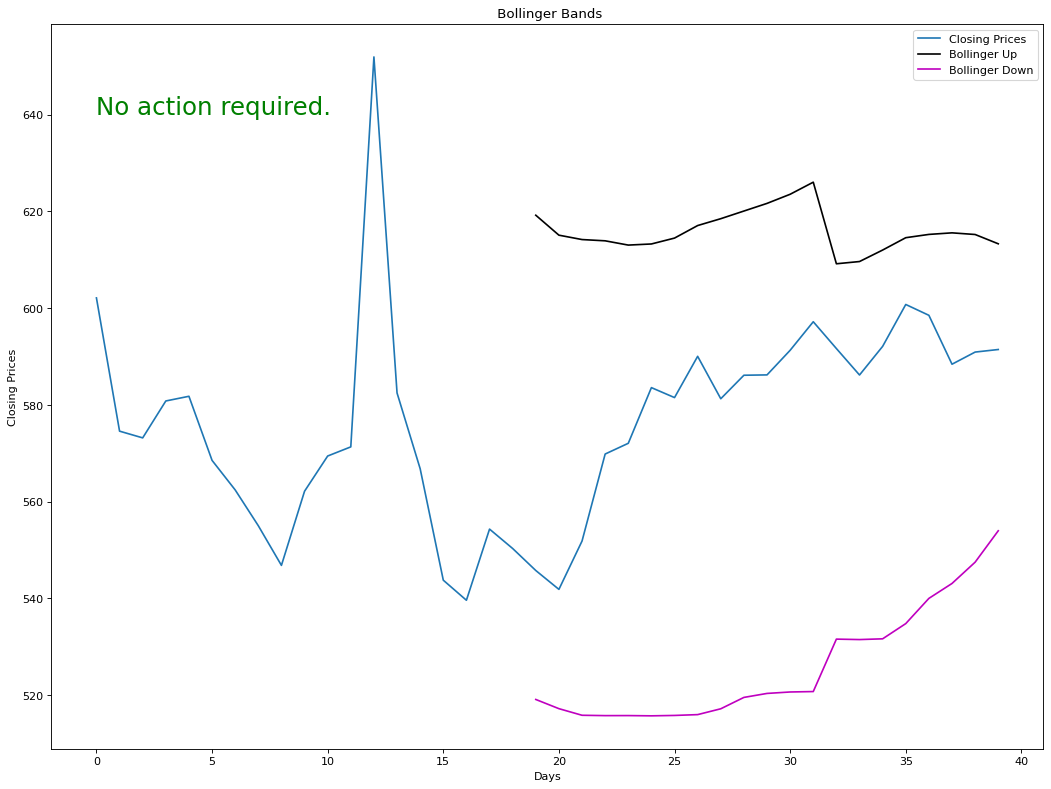

In [22]:
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)

plt.title(' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='k')
plt.plot(bollinger_down, label='Bollinger Down', c='m')
plt.legend()

#adding text inside the plot
plt.text(0, 640, to_do, fontsize = 22, c='g')

bollinger_bands_chart= 'gsef_folder/bollinger_bands.png'

import os
if os.path.exists(bollinger_bands_chart):
  os.remove(bollinger_bands_chart)
else:
  print("The Bollinger Bands chart didn't exist and it has been created.")

plt.savefig('gsef_folder/bollinger_bands.png', dpi=100)

#plt.show()